In [1]:
from collections import Counter


import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.base import SamplerMixin
from imblearn.utils import hash_X_y

import matplotlib.pyplot as plt
%matplotlib inline

## Helper functions

In [2]:
def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_sample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)


def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3,
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)  


## SubsetSMOTE vs SMOTE

We import SubsetSMOTE from the bass module. 

In [3]:
from bass import *
import warnings
warnings.filterwarnings("ignore", 
  message="Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.")
warnings.filterwarnings("ignore", message="From version 0.21, test_size \
  will always complement train_size unless both are specified")

CPU times: user 1.5 s, sys: 13 ms, total: 1.52 s
Wall time: 1.51 s


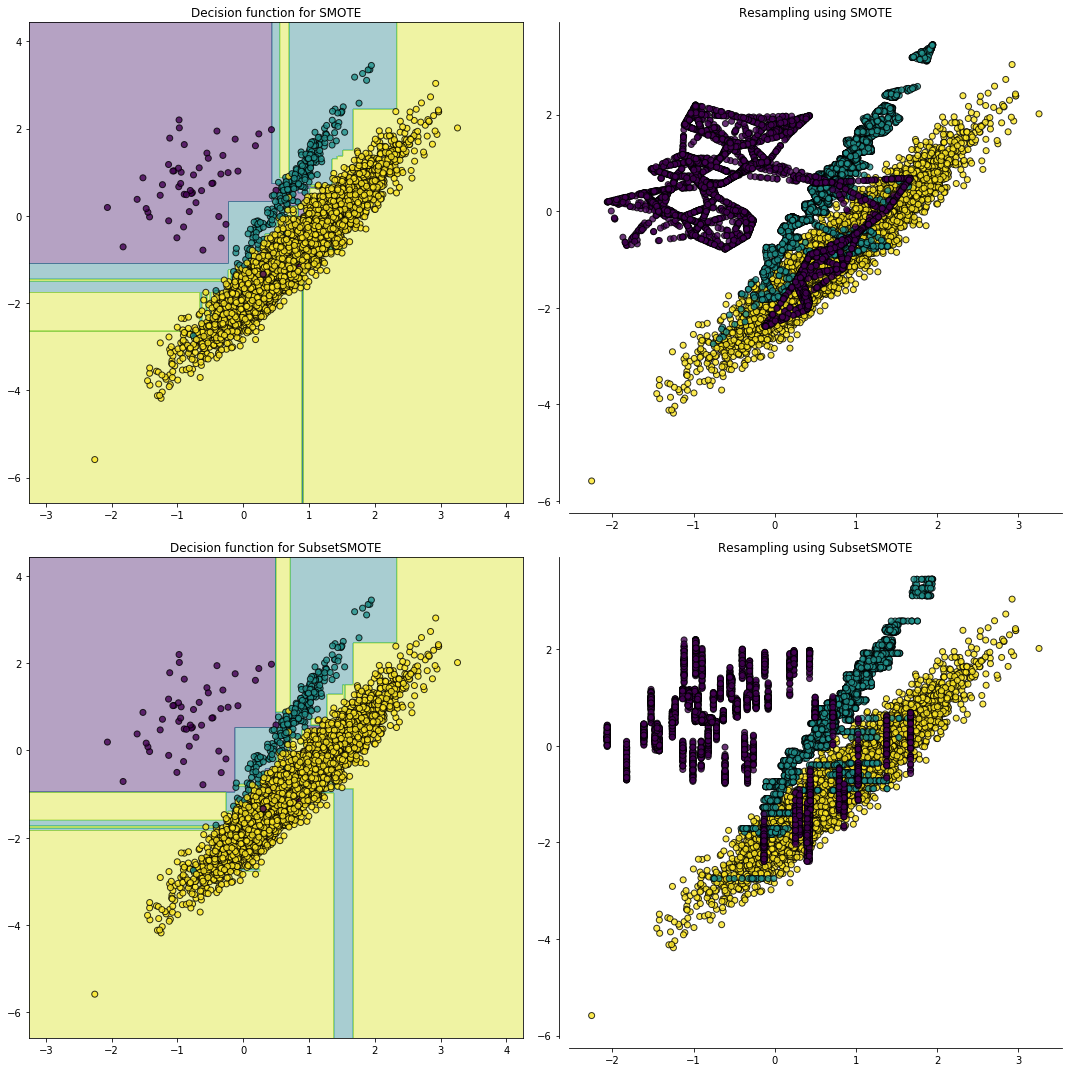

In [13]:
%%time
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94),
                      class_sep=0.8)

ax_arr = ((ax1, ax2), (ax3, ax4))
for ax, sampler in zip(ax_arr, (SMOTE(random_state=100),
                                SubsetSMOTE(random_state=111))):
    clf = make_pipeline(sampler, DecisionTreeClassifier())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
fig.tight_layout()

In [5]:
X.shape

(5000, 2)

In [6]:
y.shape

(5000,)

In [7]:
clf = LinearSVC()

clf.fit(X, y)

y_hat = clf.predict(X)

In [8]:
np.mean(y_hat == y)

0.97399999999999998

In [9]:
sampler = SMOTE()

clf = LinearSVC()

X_resample, y_resampled = sampler.fit_sample(X, y)

clf.fit(X_resample, y_resampled)



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [14]:
?SubsetSMOTE